<a href="https://colab.research.google.com/github/JeffersonBP/Aula-_JavascriptJeff/blob/main/Aula4_exercicio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Aqui você vai empregar os conhecimentos aprendidos de Python para efetuar sua própria Análise de Dados. Empregue bases de dados extraídas de um ou ambos os sites abaixo:  

a. https://wid.world/

b. https://www.gapminder.org/

O emprego de uma base formada por dados de ambos os sites é bastante enriquecedor mas não é obrigatório. Você pode empregar uma ou mais bases de um único site e deixar para estudar mais adiante merges e joins de tabelas com R. 

Faça uma Análise Exploratória dos Dados (EDA) com dados de seu interesse, empregando o Python e o que você aprendeu até aqui. Os sites apresentam diversos dados sobre as diferenças de desenvolvimento dos países e a desigualdade. Foque em perguntas que são do seu interesse sobre os dados.  

Na sua análise você deve responder ao menos quatro perguntas relevantes sobre os dados, incluir na sua análise seleções e visualizações dos dados e um texto de conclusão a cada pergunta.  

Peça ao professor modelos de código para sua implementação. 

Seu código deve ser minimamente claro e organizado. Não são necessários comentários detalhados, mas deixe claro no seu código cada parte (atividade), cada fase realizada e a resposta final com sua conclusão.  

 

Entrega:  

.pdf de print do seu notebook Python. 

Compartilhe o endereço do seu notebook Python (Google Drive ou GitHub) 100% executável para abertura no Google Colab.  

Não deixe de incluir o seu texto uma introdução justificando a escolha da análise e ao final suas conclusões. 

 

*Esta atividade vale 10 pontos e tem peso 3.*  




Vamos aplicar o EDA: 


**Passo 1**

A Análise Exploratória de Dados (EDA) é uma abordagem para análise de dados
que emprega uma variedade de técnicas (principalmente gráficas) para maximizar a
percepção e o entendimento de um conjunto de dados:


In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 


basededados = pd.read_excel('/content/WID_Data_10042022-205133.xlsx')


basededados2 = basededados.rename(columns = {'anninc_z_BR\nNational income\nP0-100 | average income or wealth | Euro € | ppp | constant (2021)\nBrazil':'income'})
display(basededados2)       # renomeei a coluna para um nome mais simples de trabalhar 
display(basededados2.shape)  # vou conhecer minha base de dados, descobrindo o número de linhas e colunas. 
display(basededados2.head()) # Descobri as 5 primeiras linhas da minha base de dados. 
display(basededados2.tail())   # método Pandas é usado para retornar n (5 por padrão) linhas inferiores de um quadro de dados ou série.
display(basededados2.income.value_counts()) # Contar a qualtidade de valores. 
display(basededados2.income.duplicated().sum())
display(basededados2.income.min(),basededados2.income.max())
display(basededados2.dtypes) # verificar o tipo de dados 


,Percentile,Year,income
0,p0p100,1950,4957.4908
1,p0p100,1951,5054.7367
2,p0p100,1952,5215.4469
3,p0p100,1953,5319.8334
4,p0p100,1954,5526.1727
...,...,...,...
67,p0p100,2017,14577.2125
68,p0p100,2018,14445.0003
69,p0p100,2019,14386.5311
70,p0p100,2020,13538.8557


(72, 3)

,Percentile,Year,income
0,p0p100,1950,4957.4908
1,p0p100,1951,5054.7367
2,p0p100,1952,5215.4469
3,p0p100,1953,5319.8334
4,p0p100,1954,5526.1727


,Percentile,Year,income
67,p0p100,2017,14577.2125
68,p0p100,2018,14445.0003
69,p0p100,2019,14386.5311
70,p0p100,2020,13538.8557
71,p0p100,2021,13985.2838


4957.4908     1
5054.7367     1
13533.1881    1
13485.6378    1
13674.2058    1
             ..
12527.8763    1
11319.0111    1
10425.9627    1
9671.1464     1
13985.2838    1
Name: income, Length: 72, dtype: int64

0

4957.4908

16512.7162

Percentile     object
Year            int64
income        float64
dtype: object

**Passo 2**

Extrair variáveis importantes

In [31]:
print(basededados2.isnull().sum())# Verificamos que não temos valores ausentes 
display(basededados2.describe())# vamos verificaar a qualidade dos nossos dados 

Percentile    0
Year          0
income        0
dtype: int64


,Year,income
count,72.00000,72.000000
mean,1985.50000,11936.790415
std,20.92845,3452.944271
min,1950.00000,4957.490800
25%,1967.75000,8476.458175
50%,1985.50000,13508.452350
75%,2003.25000,14196.714300
max,2021.00000,16512.716200


**Passo 3. Detectar Outlier **

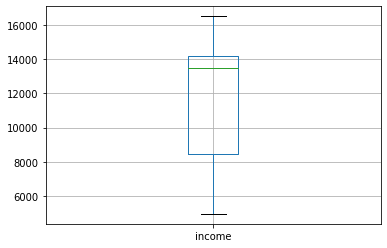

In [35]:
import matplotlib as plt
basededados2.boxplot(column='income')



**Passo 4**

testar premissas subjacentes (perguntas que fazemos sobre os dados);

**Passo 5**

 desenvolver modelos simples 


Qual o ano que tivemos a maior captação de imposto ? 

In [38]:
basededados2.loc[basededados2.income.nlargest(5).index][['Year','income']]

,Year,income
63,2013,16512.7162
64,2014,16202.9831
62,2012,16099.9095
61,2011,15988.0623
60,2010,15588.0637


QUAIS ANOS TEVE MENOS IMPOSTOS DECLARADOS ?

In [39]:
basededados2.loc[basededados2.income.nsmallest(5).index][['Year','income']]

,Year,income
0,1950,4957.4908
1,1951,5054.7367
2,1952,5215.4469
3,1953,5319.8334
4,1954,5526.1727
